<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-3-921de9e8a408>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Setting the search parameters
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [5]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
634,2024-08-07,Missing in America,Movie,6.5,102,2005,"Drama, War",1651,2005-05-28 00:00:00,Gabrielle Savage Dockterman,"Available, but lacks subtitles in PT-BR"
635,2024-08-19,The Valley of Gwangi,Movie,6.2,96,1969,"Action, Adventure, Family, Sci-Fi, Western",5038,1970-05-28 00:00:00,Jim O'Connolly,NaN
636,2024-08-20,Hell in the Pacific,Movie,7.2,103,1968,"Adventure, War",9211,1968-12-18 00:00:00,John Boorman,NaN
637,2024-08-23,A Painted House,TV Movie,6.4,97,2003,"Drama, Family",1151,2003-04-27 00:00:00,Alfonso Arau,NaN
638,2024-08-24,Focus,Movie,6.7,106,2001,"Drama, Romance",3127,2002-05-02 00:00:00,Neal Slavin,NaN


In [6]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(639, 11)

In [7]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         639 non-null    datetime64[ns]
 1   Title           639 non-null    object        
 2   Title Type      639 non-null    object        
 3   IMDb Rating     638 non-null    float64       
 4   Runtime (mins)  639 non-null    int64         
 5   Year            639 non-null    int64         
 6   Genres          639 non-null    object        
 7   Num Votes       639 non-null    int64         
 8   Release Date    639 non-null    object        
 9   Directors       635 non-null    object        
 10  Status          635 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 55.0+ KB


In [8]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

,Created,IMDb Rating,Runtime (mins),Year,Num Votes
count,639,638.000000,639.000000,639.000000,6.390000e+02
mean,2022-08-15 01:50:25.352112640,6.655956,114.691706,1989.746479,8.245953e+04
min,2020-04-29 00:00:00,0.000000,71.000000,1927.000000,0.000000e+00
25%,2021-11-06 00:00:00,6.200000,100.000000,1981.000000,4.518000e+03
50%,2022-06-21 00:00:00,6.700000,110.000000,1992.000000,2.051600e+04
75%,2023-04-24 00:00:00,7.200000,121.000000,2000.000000,6.893500e+04
max,2024-08-24 00:00:00,9.000000,317.000000,2024.000000,2.871665e+06
std,NaN,0.833250,25.765407,16.459360,2.115579e+05


# **Basic column data plotting**

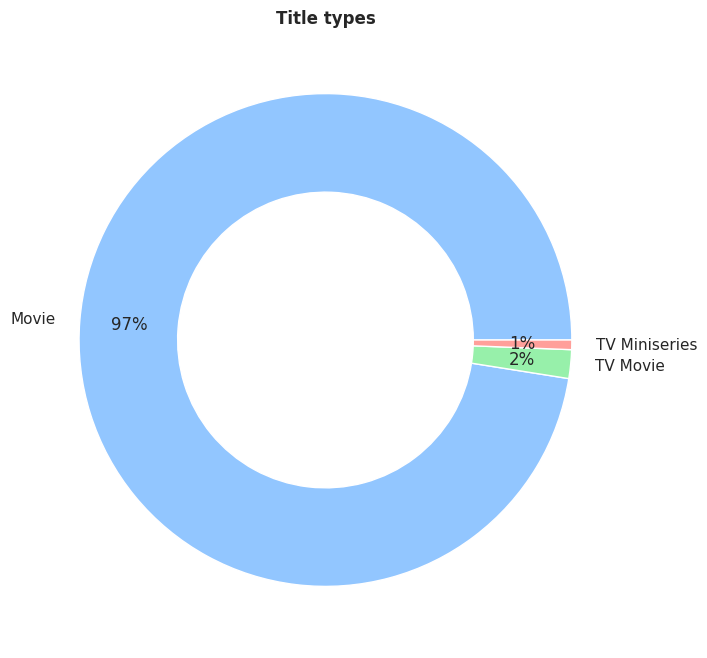

In [9]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

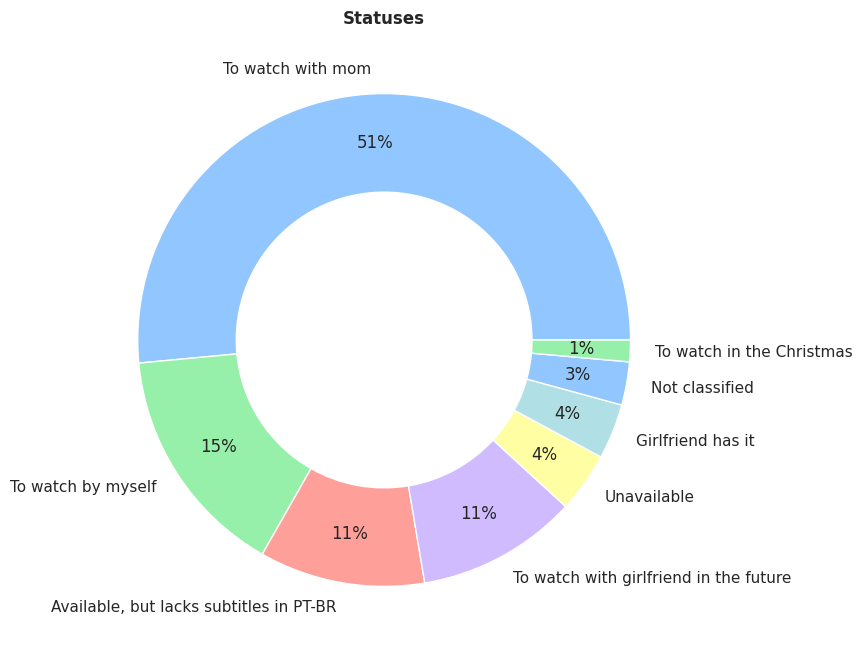

In [10]:
# Displaying the statuses present in the dataset:
wl['Status'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Statuses', fontweight = 'bold')
plt.show()

In [11]:
# Creating a datetime object based on the dates from the dataset:
wl['Created'] = wl['Created'].map(pd.to_datetime)
wl['Day Created'] = wl['Created'].apply(lambda x : x.day)
wl['Month Created'] = wl['Created'].apply(lambda x : x.month)
wl['Year Created'] = wl['Created'].apply(lambda x : x.year)
wl['Weekday Created'] = wl['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          639 non-null    datetime64[ns]
 1   Title            639 non-null    object        
 2   Title Type       639 non-null    object        
 3   IMDb Rating      638 non-null    float64       
 4   Runtime (mins)   639 non-null    int64         
 5   Year             639 non-null    int64         
 6   Genres           639 non-null    object        
 7   Num Votes        639 non-null    int64         
 8   Release Date     639 non-null    object        
 9   Directors        635 non-null    object        
 10  Status           635 non-null    object        
 11  Day Created      639 non-null    int64         
 12  Month Created    639 non-null    int64         
 13  Year Created     639 non-null    int64         
 14  Weekday Created  639 non-null    int64    

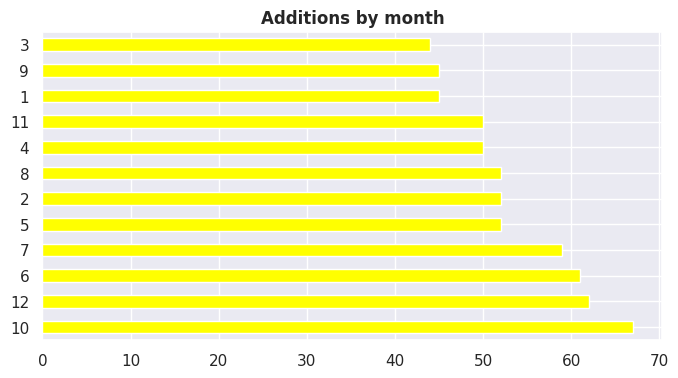

In [12]:
# Displaying the months with most and less additions:
wl['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

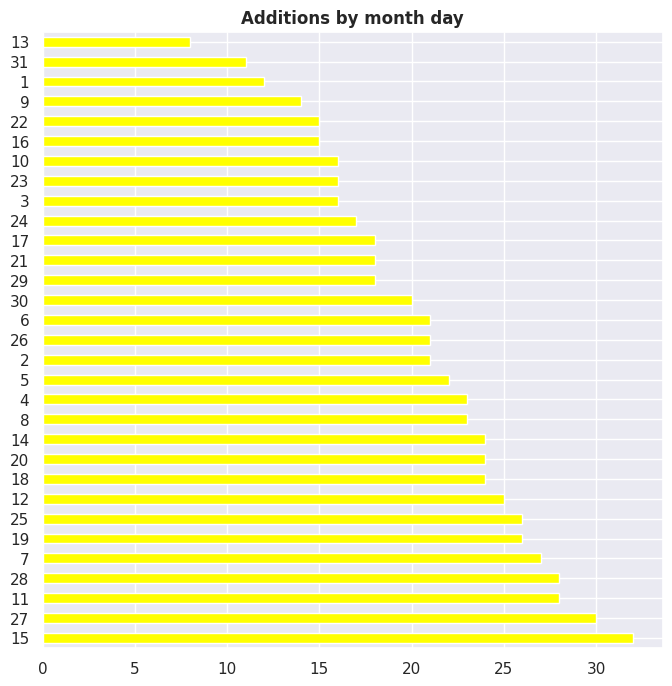

In [13]:
# Displaying the month days with most and less additions:
wl['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

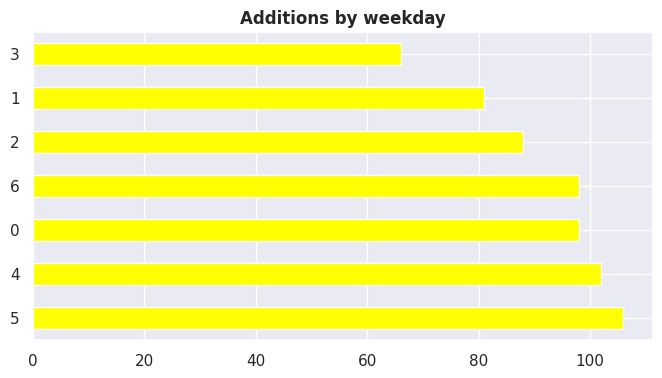

In [14]:
# Displaying the weekdays with most and less additions:
wl['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

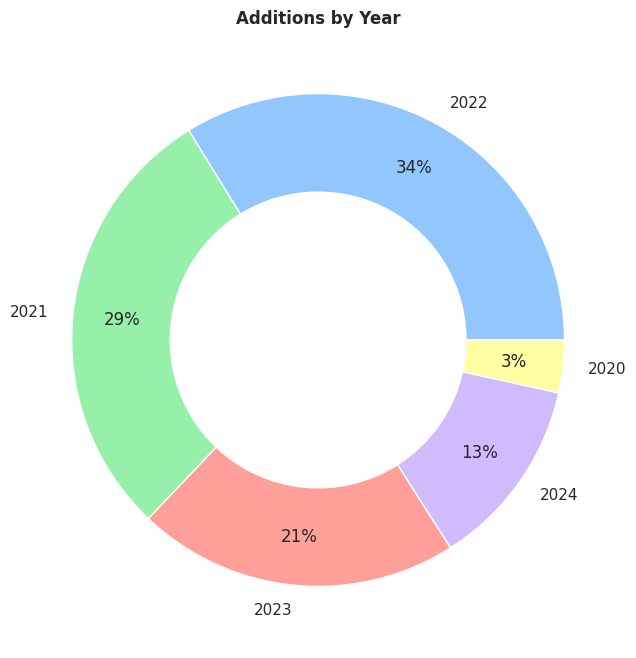

In [15]:
# Displaying the years with most and less additions:
wl['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

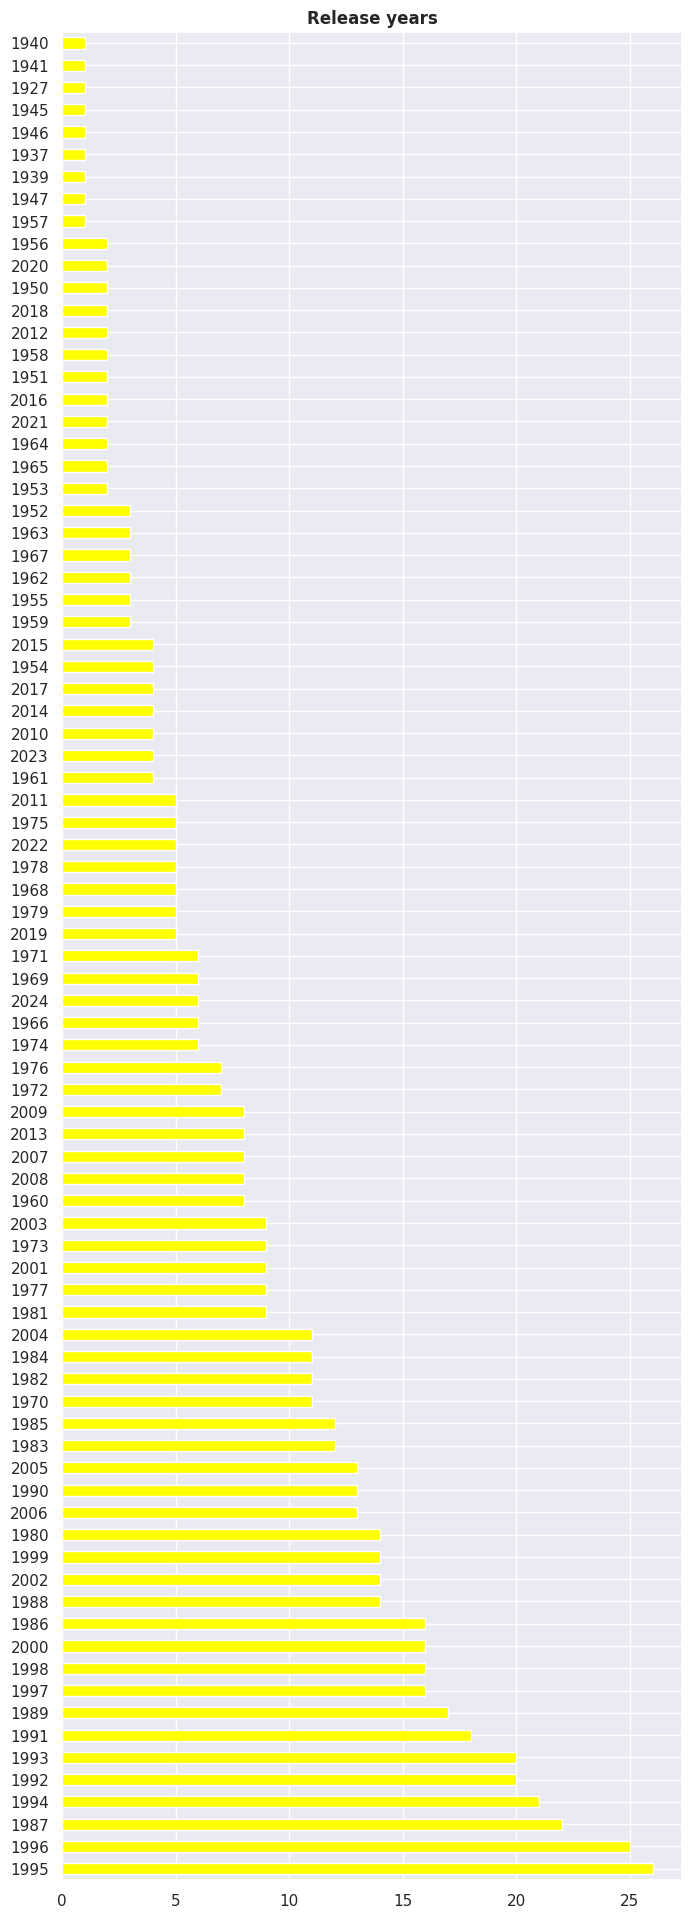

In [16]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

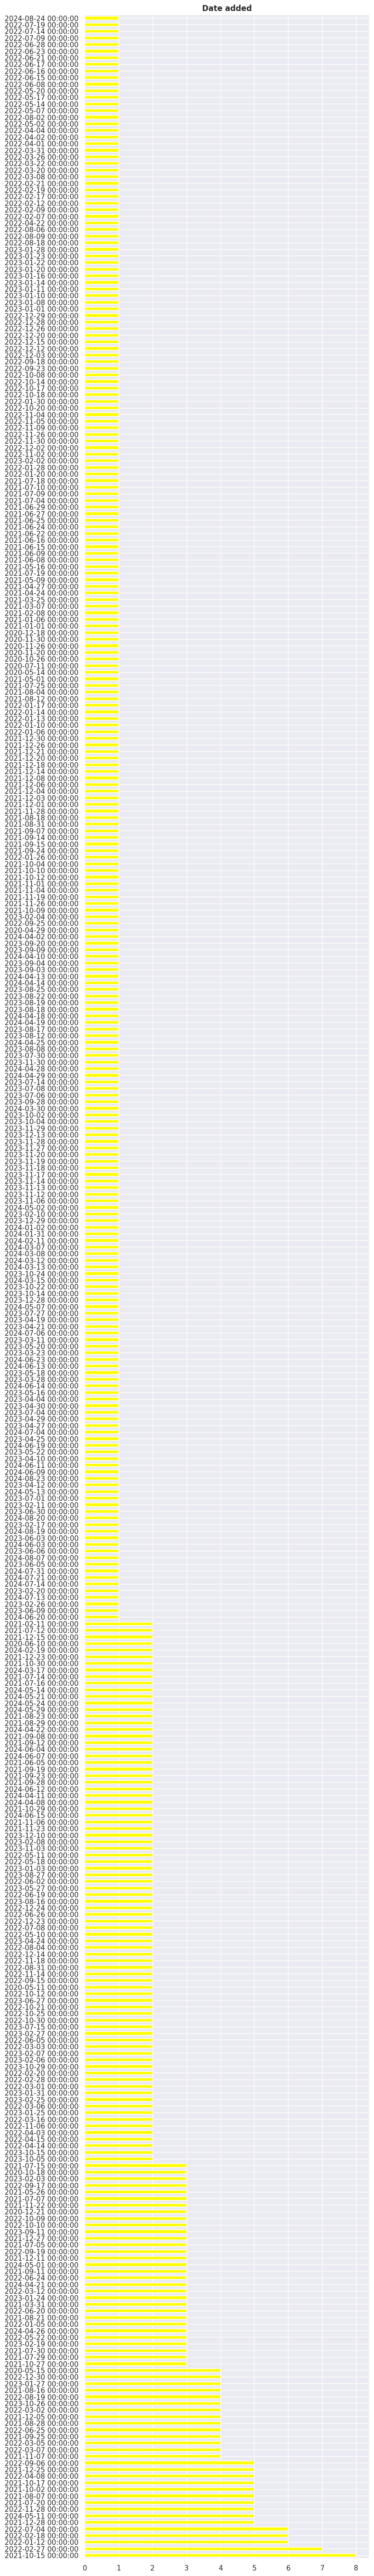

In [17]:
# Displaying distibution of dates added in the dataset:
wl['Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 72))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [18]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s
1,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s
2,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,To watch with girlfriend in the future,14,5,2020,3,2000s
4,2020-05-15,Close Encounters of the Third Kind,Movie,7.6,138,1977,"Drama, Sci-Fi",216948,1977-11-15 00:00:00,Steven Spielberg,To watch with girlfriend in the future,15,5,2020,4,1970s


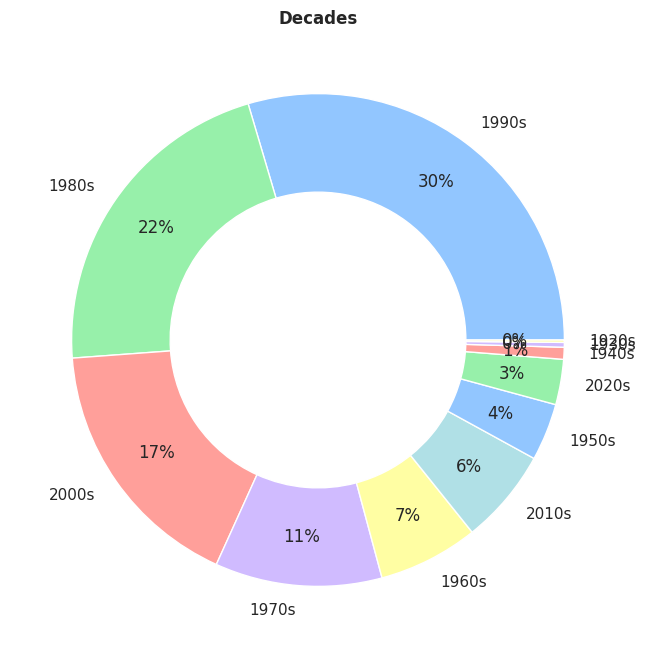

In [19]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing
1,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular
2,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,To watch with girlfriend in the future,14,5,2020,3,2000s,Regular
4,2020-05-15,Close Encounters of the Third Kind,Movie,7.6,138,1977,"Drama, Sci-Fi",216948,1977-11-15 00:00:00,Steven Spielberg,To watch with girlfriend in the future,15,5,2020,4,1970s,Good


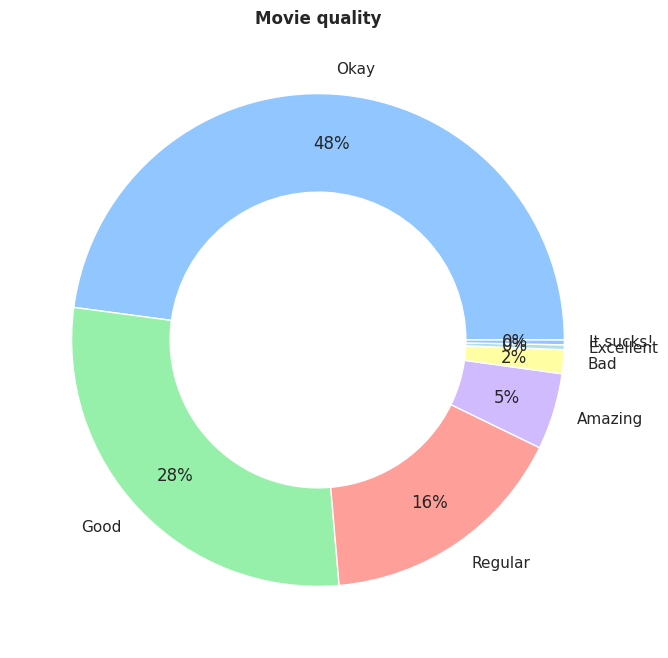

In [21]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes
1,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes
2,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,To watch with girlfriend in the future,14,5,2020,3,2000s,Regular,Less than 250k votes
4,2020-05-15,Close Encounters of the Third Kind,Movie,7.6,138,1977,"Drama, Sci-Fi",216948,1977-11-15 00:00:00,Steven Spielberg,To watch with girlfriend in the future,15,5,2020,4,1970s,Good,Less than 250k votes


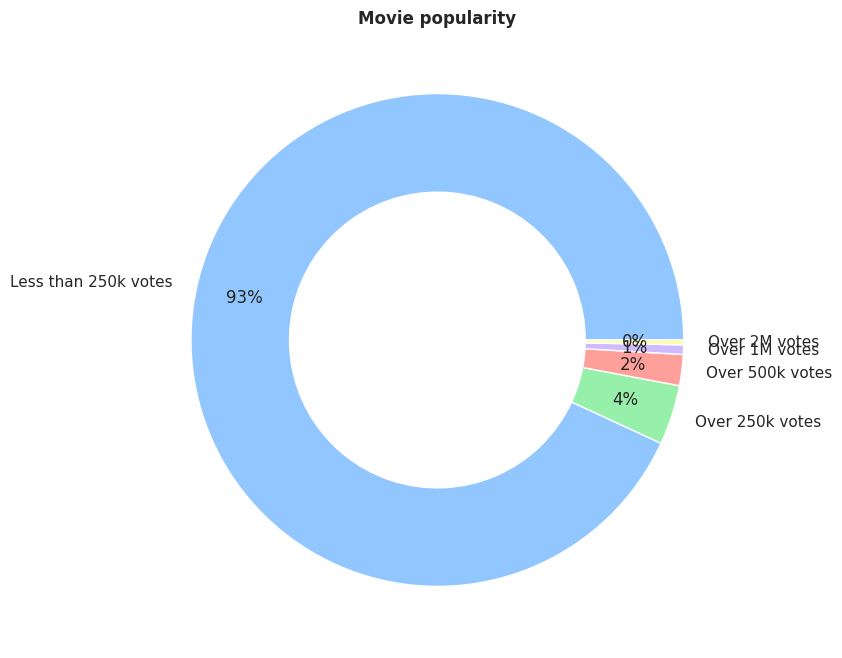

In [23]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29
1,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59
2,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,To watch with girlfriend in the future,14,5,2020,3,2000s,Regular,Less than 250k votes,Between 1h40 and 1h59
4,2020-05-15,Close Encounters of the Third Kind,Movie,7.6,138,1977,"Drama, Sci-Fi",216948,1977-11-15 00:00:00,Steven Spielberg,To watch with girlfriend in the future,15,5,2020,4,1970s,Good,Less than 250k votes,Between 2h and 2h29


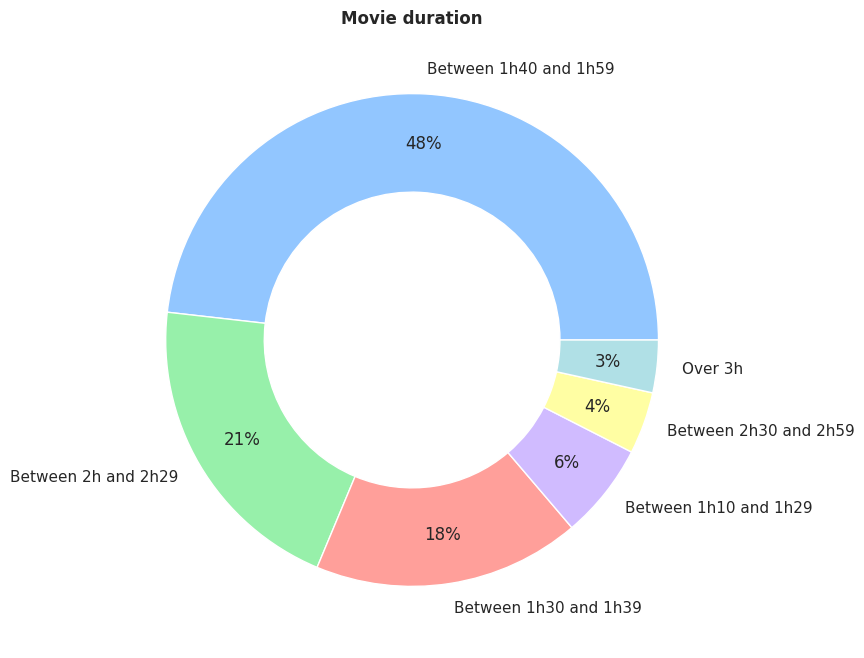

In [25]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [26]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month Created'].apply(year_quartile)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second
1,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second
2,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,"Available, but lacks subtitles in PT-BR",11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,To watch with girlfriend in the future,14,5,2020,3,2000s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second
4,2020-05-15,Close Encounters of the Third Kind,Movie,7.6,138,1977,"Drama, Sci-Fi",216948,1977-11-15 00:00:00,Steven Spielberg,To watch with girlfriend in the future,15,5,2020,4,1970s,Good,Less than 250k votes,Between 2h and 2h29,Second


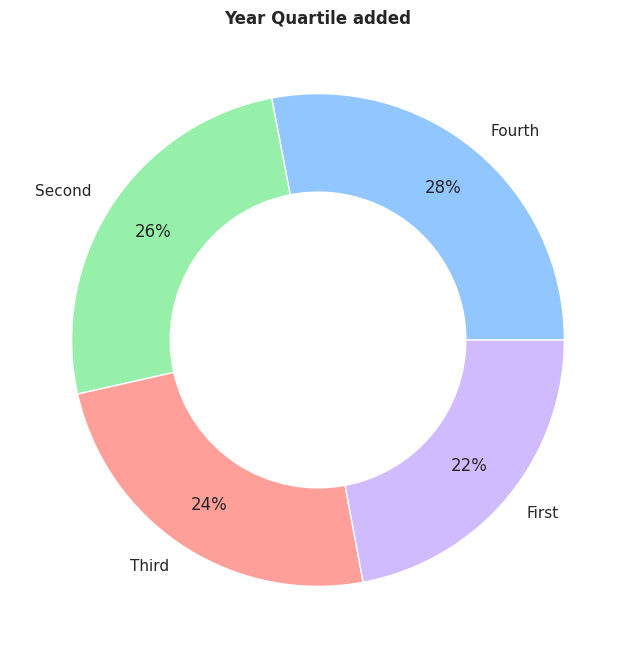

In [27]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [28]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day Created'].apply(month_half)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,...,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second,Second
1,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,...,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second,First
2,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,...,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second,First
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,...,14,5,2020,3,2000s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second,First
4,2020-05-15,Close Encounters of the Third Kind,Movie,7.6,138,1977,"Drama, Sci-Fi",216948,1977-11-15 00:00:00,Steven Spielberg,...,15,5,2020,4,1970s,Good,Less than 250k votes,Between 2h and 2h29,Second,First


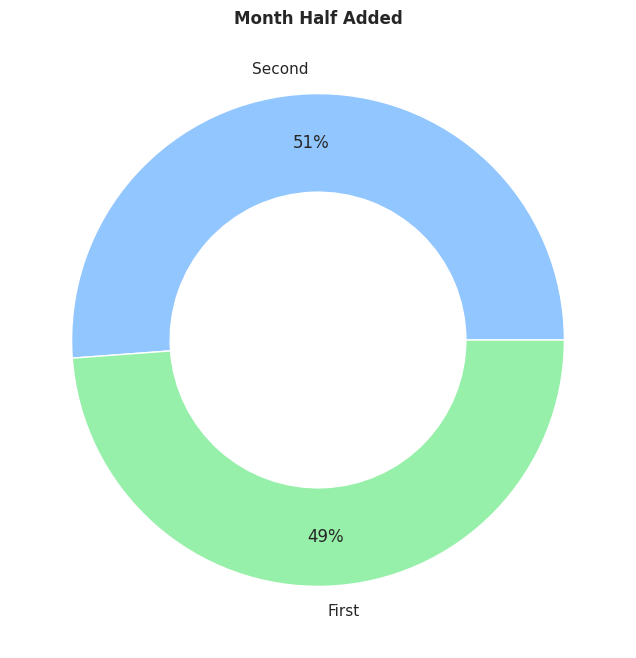

In [29]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [30]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [31]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         537   102
Adventure      539   100
Animation      625    14
Biography      575    64
Comedy         426   213
Crime          516   123
Documentary    633     6
Drama          176   463
Family         569    70
Fantasy        587    52
Film-Noir      636     3
History        602    37
Horror         621    18
Music          613    26
Musical        621    18
Mystery        600    39
Romance        475   164
Sci-Fi         589    50
Sport          595    44
Thriller       522   117
War            589    50
Western        615    24


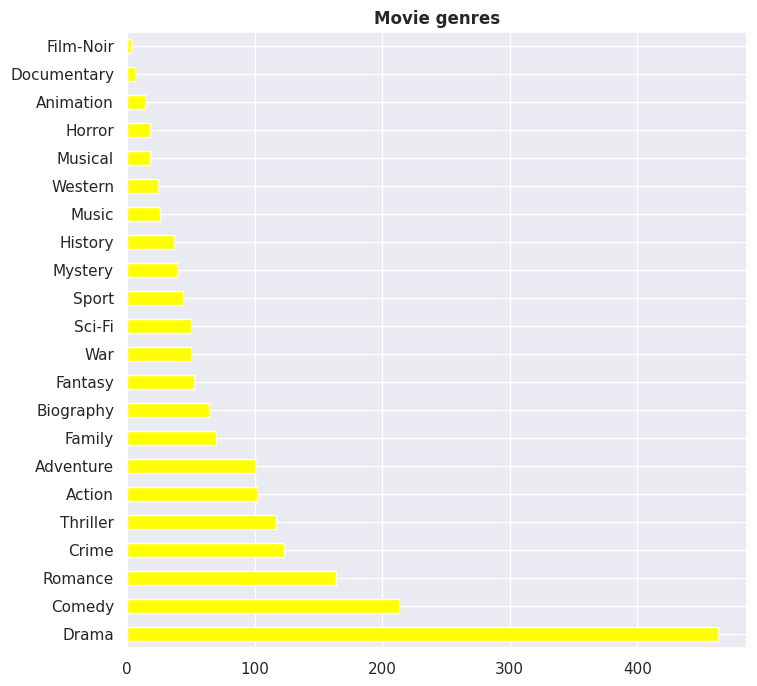

In [32]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [33]:
wl = wl[wl['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = wl.index, columns = wl['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-33-96bf50eac1cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [34]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            633     0
Alan Parker            634     0
Alan Shapiro           634     0
Albert Band            634     0
Albert Brooks          634     0
...                    ...   ...
William Friedkin       634     0
William Wyler          634     0
Wolfgang Petersen      634     0
Wolfgang Reitherman    633     0
Zoltan Korda           634     1

[513 rows x 2 columns]


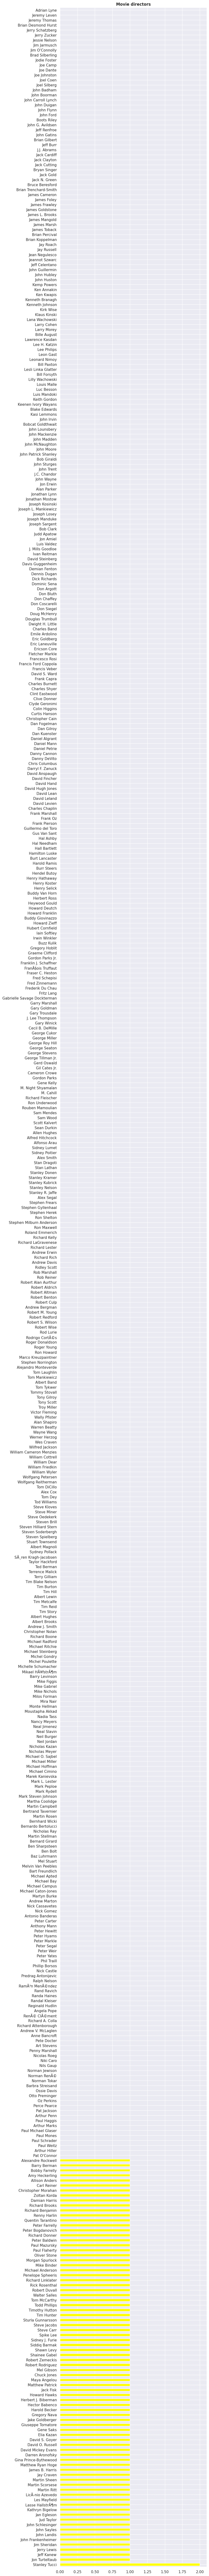

In [35]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 140))
plt.ylabel(None)
plt.title('Movie directors', fontweight = 'bold')
plt.show()